# Étude on Ellsworth Kelly's "Seine" (1951)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

## Matplotlib's `imshow`
In this notebook, we are using Matplotlib's `imshow` plotting method, which displays a matrix. Because we use a matrix with only single-dimensional entries, the colors are decided by a "color map" which translates reals from [0, 1] into a color according to some predefined rules. In this example, we use the grayscale color map `plt.cm.gray`.

In [4]:
mat =[
    [0]*100,
    [0]*100,
    [1]*100,
    [1]*100,
    [0]*100,
    [0]*100,
    [0]*100,
    [0]*100,
]

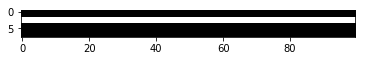

In [5]:
plt.imshow(mat, cmap=plt.cm.gray)

## Utility methods for generation and drawing
This section contains one method `seine_matrix` which generates a rectangular matrix using a similar process as the one described to be Ellsworth Kelly's method of designing his original artwork.

Some of the generation parameters that can be changed are the `width` and `height` of the matrix (typically `width = 2*height + 1` if keeping with Kelly's aspect ratio), the `bc_diff` which indicates how many black squares are added to each column from the previous one.

Some of the drawing parameters that can be changed include `cmap`, the color map used (here one that is just black or white), and `dpi` the resolution of the image.

In [6]:
def seine_matrix(width, height, bc_diff=1):
    mat = []
    black_cells = 1
    bc_diff = bc_diff
    
    for i in range(width):
        col = [1]*height
        
        # Coloring strategy (with replacement)
        square_ids = list(range(len(col)))
        for j in range(black_cells):
            if len(square_ids) == 0:
                break
            num = random.choice(square_ids)
            square_ids.remove(num)
            col[num] = 0
        black_cells += bc_diff
        
        # Reverse course once height is reached
        if black_cells >= height or black_cells <= 1:
            bc_diff = -bc_diff
            
        # Pushing column to matrix
        mat.append(col)
    
    # Tranpose
    t_mat = list(zip(*mat))
    
    return t_mat

In [7]:
def plot_matrix(mat, cmap=plt.cm.gray, ax=None, dpi=160, hide_grid=True):
    if ax == None:
        height = len(mat)
        width = len(mat[0])
        ratio = float(height)/float(width)
        
        fig = plt.figure(figsize=(1.0, float(height)/float(width)), dpi=dpi)
        ax = fig.add_axes([0,0,1,1])

    if not hide_grid:
        ax.grid(True)
    else:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        #ax.axis('off')
        
        # Thickness of frame
        [i.set_linewidth(0.1) for i in ax.spines.values()]

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.tick_params(which='both', size=0.0)

    ax.set_aspect('equal', 'datalim')
    
    plt.imshow(mat, cmap=cmap)
    plt.close()
    
    return fig

## Gallery of examples
We first use the same generation parameters as Kelly's original construction: dimensions of 83⨉41 (per Yve-Alain Bois' research), and then double the size of the parameters to appear to get the image in "higher resolution."

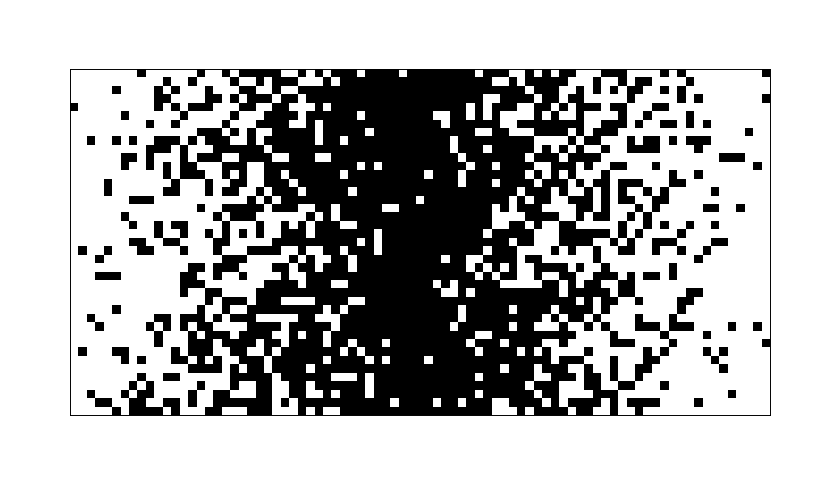

In [8]:
plot_matrix(seine_matrix(83, 41, bc_diff=1), dpi=700)

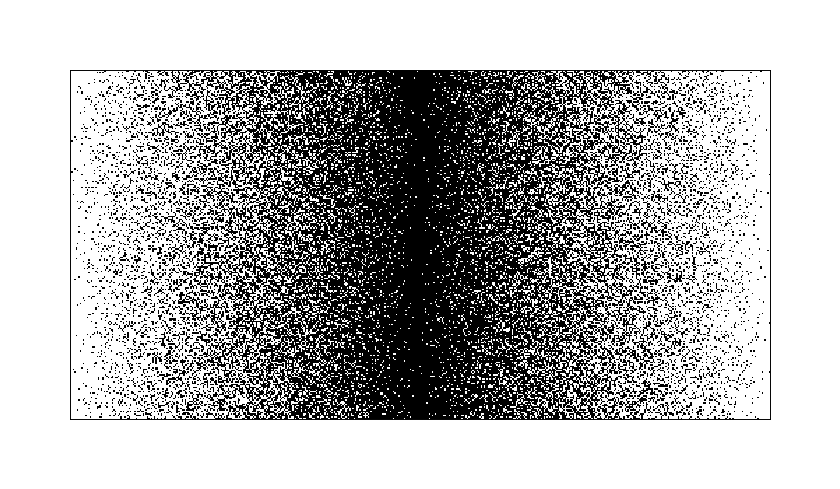

In [9]:
plot_matrix(seine_matrix(501, 250, bc_diff=1), dpi=700)

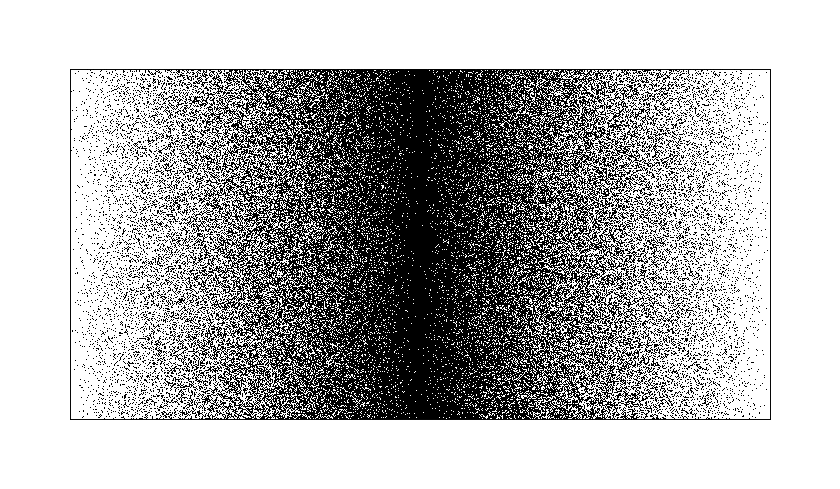

In [10]:
plot_matrix(seine_matrix(2001, 1000, bc_diff=1), dpi=700)

## Gallery of other examples
We can then try various combinations of parameters.

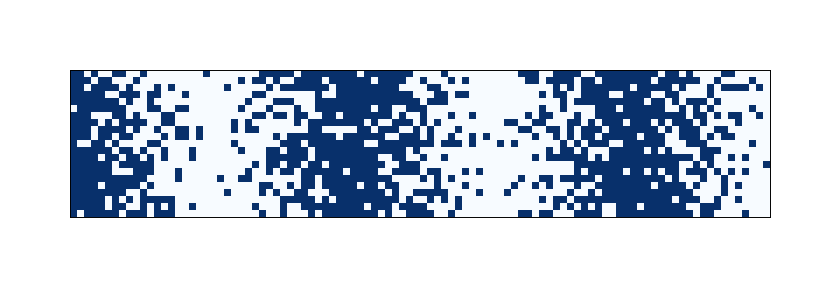

In [11]:
plot_matrix(seine_matrix(100, 21, bc_diff=1), dpi=700, cmap=plt.cm.Blues)